<a href="https://colab.research.google.com/github/umeshrawat/MachineLearning/blob/master/Supervised_Regression/VolcanoEruption/src/Predict_Volcanic_Eruption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stage 1: Load the datasets from the source files.

In [1]:
#Open the code repo

!git clone https://github.com/umeshrawat/MachineLearning.git

Cloning into 'MachineLearning'...
remote: Enumerating objects: 296, done.
remote: Counting objects: 100% (296/296), done.
remote: Compressing objects: 100% (287/287), done.
remote: Total 296 (delta 40), reused 222 (delta 7), pack-reused 0
Receiving objects: 100% (296/296), 13.63 MiB | 6.25 MiB/s, done.
Resolving deltas: 100% (40/40), done.


In [32]:
import os
import pandas as pd
from matplotlib import pyplot as plt

def clear_contents(index, obs, list1, list2, dataFrame):
  index = 0
  obs = []
  list1 = []
  list2 = []
  dataFrame = dataFrame.iloc[0:0]
  return index, obs, list1, list2, dataFrame

def readDataSets():
  #os.chdir('/content/MachineLearning/Supervised_Regression/VolcanoEruption/Volcano_Dataset')
  # Specify the directory containing the subfolders and files
  root_folder_path = '/content/MachineLearning/Supervised_Regression/VolcanoEruption/Volcano_Dataset'
  observations = []
  index = 0
  array1 = []
  array2 = []
  dataFrames_list = []
  # Walk through the directory tree
  for subdir, dirs, files in os.walk(root_folder_path):
      for dir_file in files:
          file_path = os.path.join(subdir, dir_file)
          #print(file_path)
          if file_path.endswith('.txt'):
            with open(file_path, 'r') as file:
              for line in file:
                if line.strip():  # Ignore empty lines
                  index += 1
                  if index == 12:
                    array1 = line.split(',')
                  elif index == 13:
                    array2 = line.split(',')
                  else:
                    key, value = line.split(',', 1)
                    observations.append({key.strip(): value.strip()})

              # Display the parsed observations
              #for observation in observations:
                #print(observation)
              dataFrame = pd.DataFrame({'TimeSteps':array1,'Tilt_Value': array2})
              dataFrame[['TimeSteps','Tilt_Value']] = dataFrame[['TimeSteps','Tilt_Value']].astype(float)
              dataFrame.index = dataFrame.TimeSteps
              dataFrames_list.append(dataFrame)
              index, observations, array1, array2, dataFrame = clear_contents(index, observations, array1, array2, dataFrame)
              print(len(dataFrames_list))
              print('\n File 1:'+file_path+' completed.'  + '='*10 + '\n')  # Separator between files

  return dataFrames_list

In [33]:
dataFrames = readDataSets()

1

 File 1:/content/MachineLearning/Supervised_Regression/VolcanoEruption/Volcano_Dataset/Volcano4/observation10.txt completed.==========

2

 File 1:/content/MachineLearning/Supervised_Regression/VolcanoEruption/Volcano_Dataset/Volcano4/observation15.txt completed.==========

3

 File 1:/content/MachineLearning/Supervised_Regression/VolcanoEruption/Volcano_Dataset/Volcano4/observation13.txt completed.==========

4

 File 1:/content/MachineLearning/Supervised_Regression/VolcanoEruption/Volcano_Dataset/Volcano4/observation12.txt completed.==========

5

 File 1:/content/MachineLearning/Supervised_Regression/VolcanoEruption/Volcano_Dataset/Volcano4/observation6.txt completed.==========

6

 File 1:/content/MachineLearning/Supervised_Regression/VolcanoEruption/Volcano_Dataset/Volcano4/observation2.txt completed.==========

7

 File 1:/content/MachineLearning/Supervised_Regression/VolcanoEruption/Volcano_Dataset/Volcano4/observation9.txt completed.==========

8

 File 1:/content/MachineLea

Use TSFRESH to read the raw data.

In [5]:
!pip install tsfresh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 9.2 MB/s eta 0:00:00


In [56]:
import pandas as pd

# Function to parse the file and load time series data
def load_time_series(file_path):
  with open(file_path, 'r') as file:
    lines = file.readlines()
    index = 0
    # Separate the configuration parameters and the time series data
    config_lines = []
    data_lines = []
    is_data = False

    for line in lines:
        if line.strip():  # Ignore empty lines
          index += 1
          if index >= 12:
            data_lines.append(line)
          else:
            config_lines.append(line)

  # Process the time series data
  # Get the last folder name and file name
  folder_name = os.path.basename(os.path.dirname(file_path))
  file_name = os.path.basename(file_path)
  dataFrame = pd.DataFrame({'Id': folder_name + "_" + file_name, 'TimeSteps': data_lines[0].split(','),'Tilt_Value': data_lines[1].split(',')})
  dataFrame[['TimeSteps','Tilt_Value']] = dataFrame[['TimeSteps','Tilt_Value']].astype(float)
  #dataFrame.index = dataFrame.TimeSteps

  return dataFrame

In [60]:
import os
import glob
import pandas as pd
from tsfresh import extract_features, select_features
from tsfresh.utilities.dataframe_functions import impute

def load_data_from_subdirectories(root_dir):
    """
    Load time series data from multiple CSV files in multiple subdirectories
    and add an 'id' column to identify individual time series.

    Parameters:
    - root_dir (str): The root directory containing subdirectories with CSV files.

    Returns:
    - pd.DataFrame: Combined DataFrame containing time series data from all CSV files with 'id' column.
    """
    all_files = glob.glob(os.path.join(root_dir, '**', '*.txt'), recursive=True)
    data_frames = []

    for file_path in all_files:
      df = load_time_series(file_path)
      data_frames.append(df)

    combined_df = pd.concat(data_frames, ignore_index=True)
    return combined_df

In [61]:
# Load data
root_folder_path = '/content/MachineLearning/Supervised_Regression/VolcanoEruption/Volcano_Dataset'
time_series_data = load_data_from_subdirectories(root_folder_path)


In [70]:
print(time_series_data.head(10))

                           Id  TimeSteps    Tilt_Value
0  Volcano4_observation10.txt    -1109.0 -1.005693e-10
1  Volcano4_observation10.txt    -1108.0 -7.325659e-11
2  Volcano4_observation10.txt    -1107.0  1.440142e-10
3  Volcano4_observation10.txt    -1106.0 -3.843803e-11
4  Volcano4_observation10.txt    -1105.0  2.153403e-11
5  Volcano4_observation10.txt    -1104.0  6.069313e-11
6  Volcano4_observation10.txt    -1103.0  2.496846e-11
7  Volcano4_observation10.txt    -1102.0 -4.595947e-11
8  Volcano4_observation10.txt    -1101.0 -1.703676e-11
9  Volcano4_observation10.txt    -1100.0  1.655274e-10


In [71]:
grouped_counts = time_series_data.groupby('Id').size()

print(grouped_counts)

Id
Volcano10_observation1.txt     1188
Volcano10_observation10.txt    1150
Volcano10_observation11.txt    1416
Volcano10_observation12.txt    1337
Volcano10_observation13.txt    1116
                               ... 
Volcano9_observation5.txt      1526
Volcano9_observation6.txt      1526
Volcano9_observation7.txt      1416
Volcano9_observation8.txt      1416
Volcano9_observation9.txt      1223
Length: 189, dtype: int64


In [72]:
time_series_data[time_series_data.Id == 'Volcano4_observation10.txt']

,Id,TimeSteps,Tilt_Value
0,Volcano4_observation10.txt,-1109.0,-1.005693e-10
1,Volcano4_observation10.txt,-1108.0,-7.325659e-11
2,Volcano4_observation10.txt,-1107.0,1.440142e-10
3,Volcano4_observation10.txt,-1106.0,-3.843803e-11
4,Volcano4_observation10.txt,-1105.0,2.153403e-11
...,...,...,...
1106,Volcano4_observation10.txt,-4.0,1.414110e-09
1107,Volcano4_observation10.txt,-3.0,1.985486e-09
1108,Volcano4_observation10.txt,-2.0,2.432641e-09
1109,Volcano4_observation10.txt,-1.0,2.971969e-09


In [69]:
print(dataFrames[0].describe())

         TimeSteps    Tilt_Value
count  1111.000000  1.111000e+03
mean   -554.040504  1.870144e-11
std     320.795089  2.209847e-10
min   -1109.000000 -2.950398e-10
25%    -831.500000 -6.489043e-11
50%    -554.000000  5.575621e-12
75%    -276.500000  7.569748e-11
max       0.000000  4.227647e-09


In [75]:
# Extract features
extracted_features = extract_features(time_series_data, column_id='Id', column_sort='TimeSteps')

# Impute missing values
impute(extracted_features)

# Assuming you have a target variable 'y' for feature selection
# Example target variable:
y = pd.Series([0, 1], index=[0, 1])

# Select relevant features
selected_features = select_features(extracted_features, y)

# Display the selected features
import ace_tools as tools; tools.display_dataframe_to_user(name="Selected Features", dataframe=selected_features)


Feature Extraction: 100%|██████████| 189/189 [05:44<00:00,  1.82s/it]
/usr/local/lib/python3.10/dist-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['Tilt_Value__autocorrelation__lag_0' 'Tilt_Value__autocorrelation__lag_1'
 'Tilt_Value__autocorrelation__lag_2' 'Tilt_Value__autocorrelation__lag_3'
 'Tilt_Value__autocorrelation__lag_4' 'Tilt_Value__autocorrelation__lag_5'
 'Tilt_Value__autocorrelation__lag_6' 'Tilt_Value__autocorrelation__lag_7'
 'Tilt_Value__autocorrelation__lag_8' 'Tilt_Value__autocorrelation__lag_9'
 'Tilt_Value__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


AssertionError: X and y must contain the same number of samples.

Below is the method call for loading raw data onto Panda dataframes list (without using TSFRESH)

In [ ]:
from pandas.plotting import autocorrelation_plot

def plot_the_dataframes(dataFrames):
  #print(dataFrames[188].describe())
  #fig_size = plt.rcParams["figure.figsize"] #Get current size
  #fig_size[0] = 13                         #Set figure width to 13 and height to 9
  #fig_size[1] = 9
  #plt.rcParams["figure.figsize"] = fig_size

  #autocorrelation_plot(dataFrames[5])
  #Data Exploration
  plt.figure(figsize=(16,7))
  #plt.ylim(min(dataFrames[5]['Tilt_Value']), max(dataFrames[5]['Tilt_Value']))
  #plt.xlim(min(dataFrames[5]['TimeSteps']), max(dataFrames[5]['TimeSteps']))
  fig = plt.figure(1)
  ax1 = fig.add_subplot(111)
  ax1.set_xlabel('TimeSteps')
  ax1.set_ylabel('Tilt_Value')
  ax1.plot(dataFrames[5]['TimeSteps'], dataFrames[5]['Tilt_Value'])

Stage 2: EDA:

1. Visualize the data frames to undestand the data and patterns - Seasonality and Trends.
2. Perform Stationarity check and measure using plot and Duckey Fuller Test.

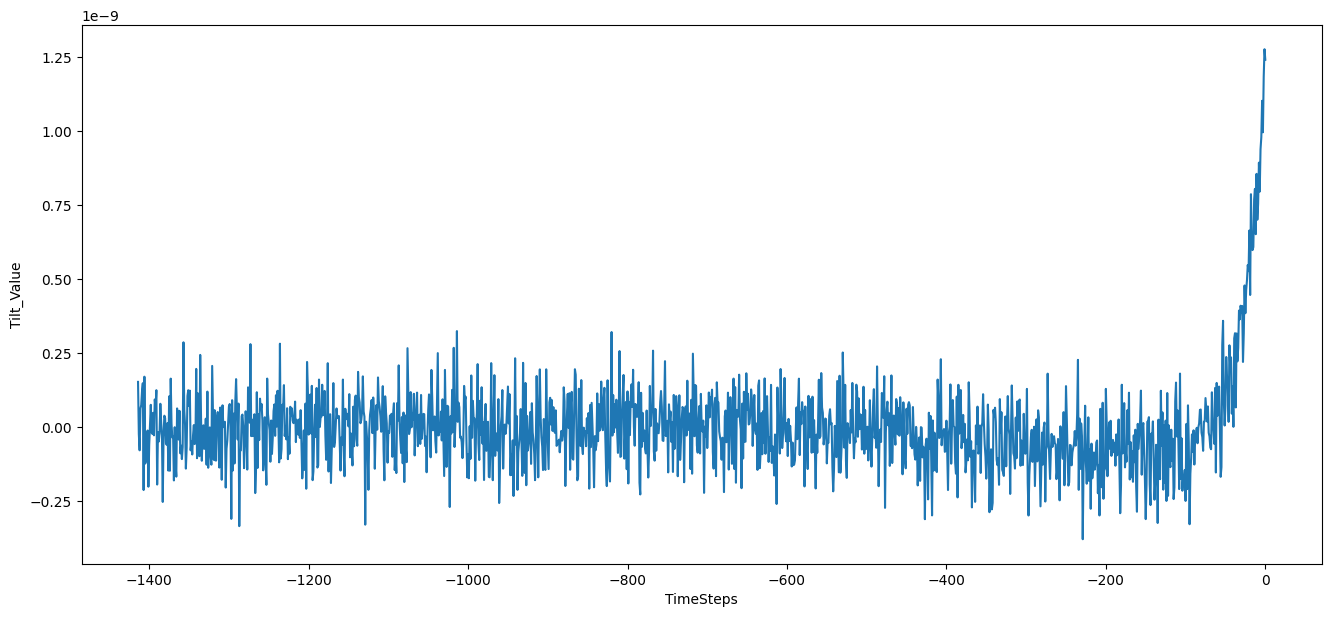

In [ ]:
plot_the_dataframes(dataFrames)

In [ ]:
dataFrames[5].describe()

,TimeSteps,Tilt_Value
count,1416.000000,1.416000e+03
mean,-706.925141,-1.099972e-12
std,408.484926,1.583493e-10
min,-1414.000000,-3.804133e-10
25%,-1060.250000,-8.727226e-11
50%,-706.500000,-1.436936e-11
75%,-353.750000,6.129041e-11
max,0.000000,1.275382e-09


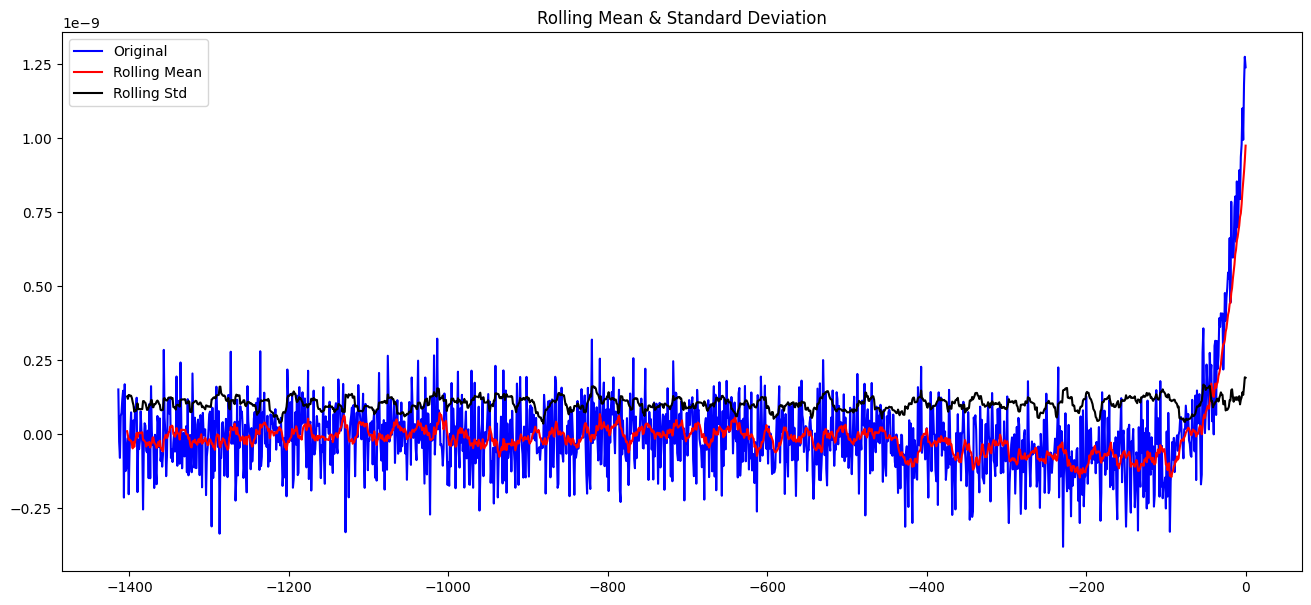

In [ ]:
# Determine Rolling Statistics
rollMean = dataFrames[5].Tilt_Value.rolling(12).mean()
rollStd = dataFrames[5].Tilt_Value.rolling(12).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

#Plot rolling statistics:
orig = plt.plot(dataFrames[5].Tilt_Value, color='blue',label='Original')
mean = plt.plot(rollMean, color='red', label='Rolling Mean')
std = plt.plot(rollStd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

Above plot shows Rolling Standard Deviation is not constant over period of time,
while Rolling Mean is relatively constant.

--> This means that this series is not a Stationary series.
We will take a Log transformation first to make the stationary.

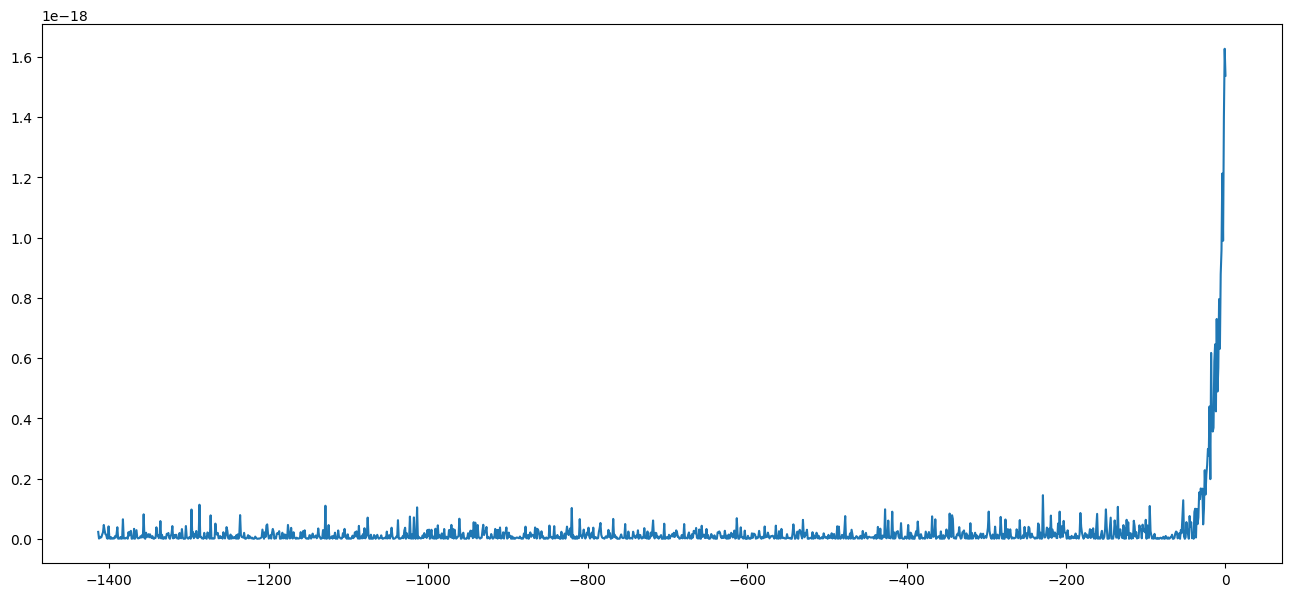

In [ ]:
#Lets try transformation
plt.figure(figsize=(16,7))
fig = plt.figure(1)

import numpy as np
ts_log = np.power(dataFrames[5].Tilt_Value, 2)
plt.plot(ts_log)

In [ ]:
ts_log.info()

<class 'pandas.core.series.Series'>
Index: 1416 entries, -1414.0 to 0.0
Series name: Tilt_Value
Non-Null Count  Dtype  
--------------  -----  
1416 non-null   float64
dtypes: float64(1)
memory usage: 22.1 KB


Well, the above plot shows the time series is still not Stationary.

To understand this clearly, we will decompose this log transformed time series and check for Trend, Seasonality measures.


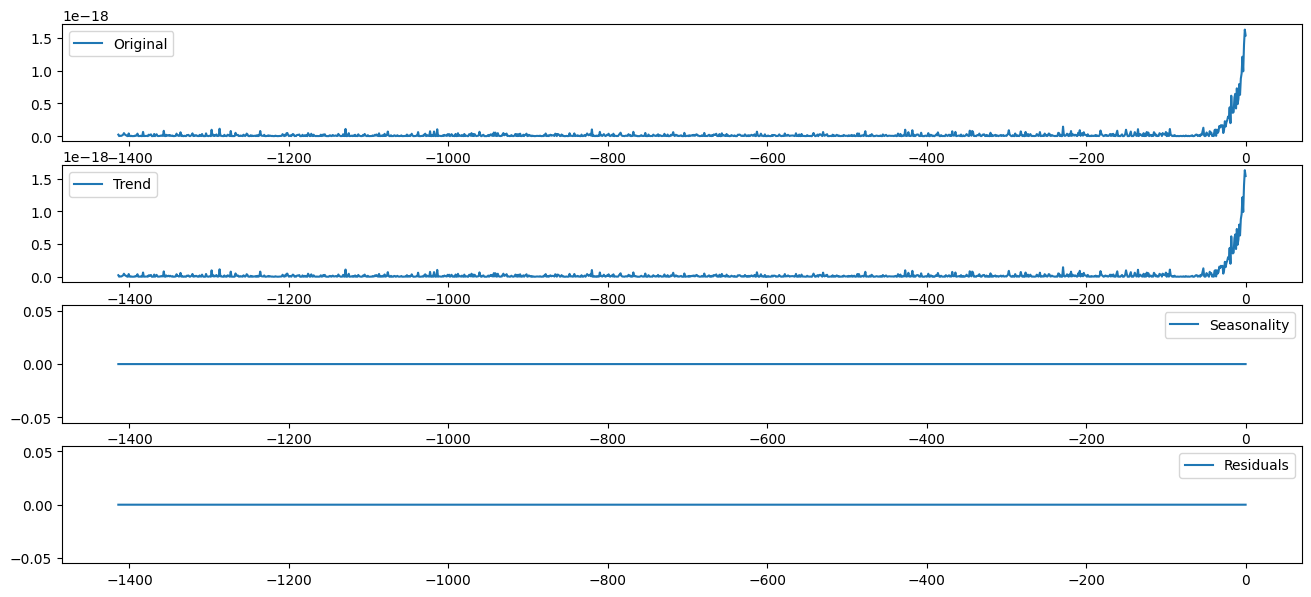

In [ ]:
#Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
ts_log.dropna(inplace=True)
decomposition = seasonal_decompose(ts_log,period=1,model = 'additive')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

From above plot, it is evident that the Trend component is contributing more to the Time Series.

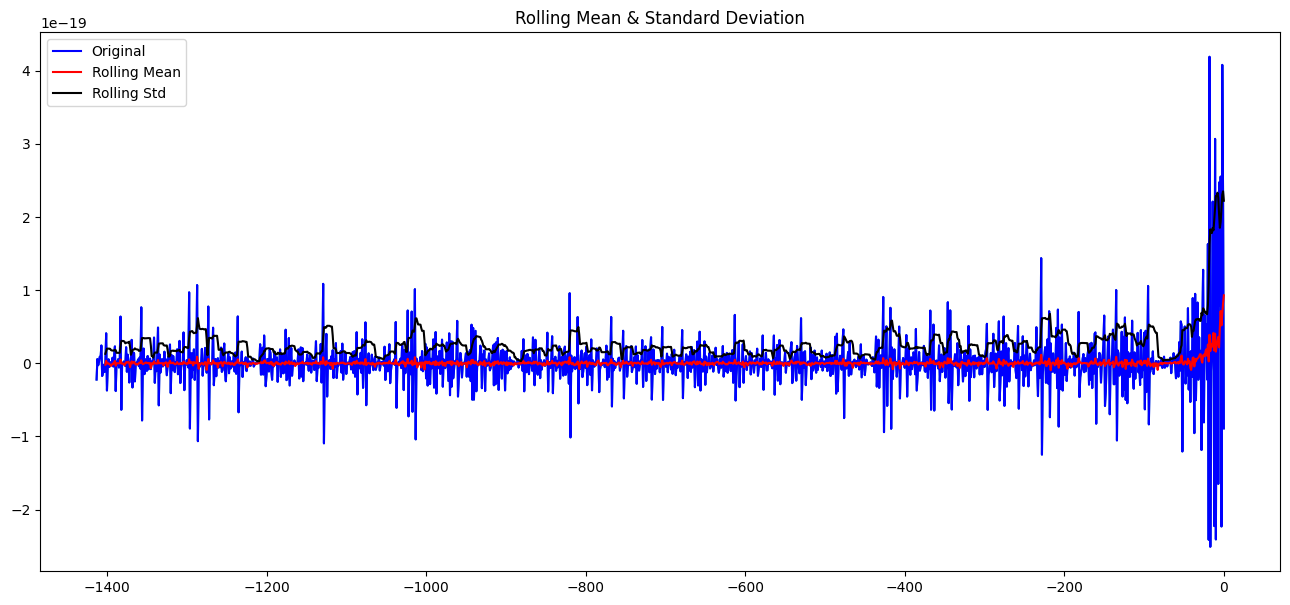

In [ ]:
import matplotlib.pyplot as plt

#Lets try differencing
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

#Determing rolling statistics
rolLmean = ts_log_diff.rolling(12).mean()
rolLstd = ts_log_diff.rolling(12).std()




#Plot rolling statistics:
orig = plt.plot(ts_log_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

Now, from the above plot, there is no upward pattern in mean or in Standard Deviation.

Now, this Time Series is a Stationary Time Series as it has constant mean,
and constant Standard Deviation.

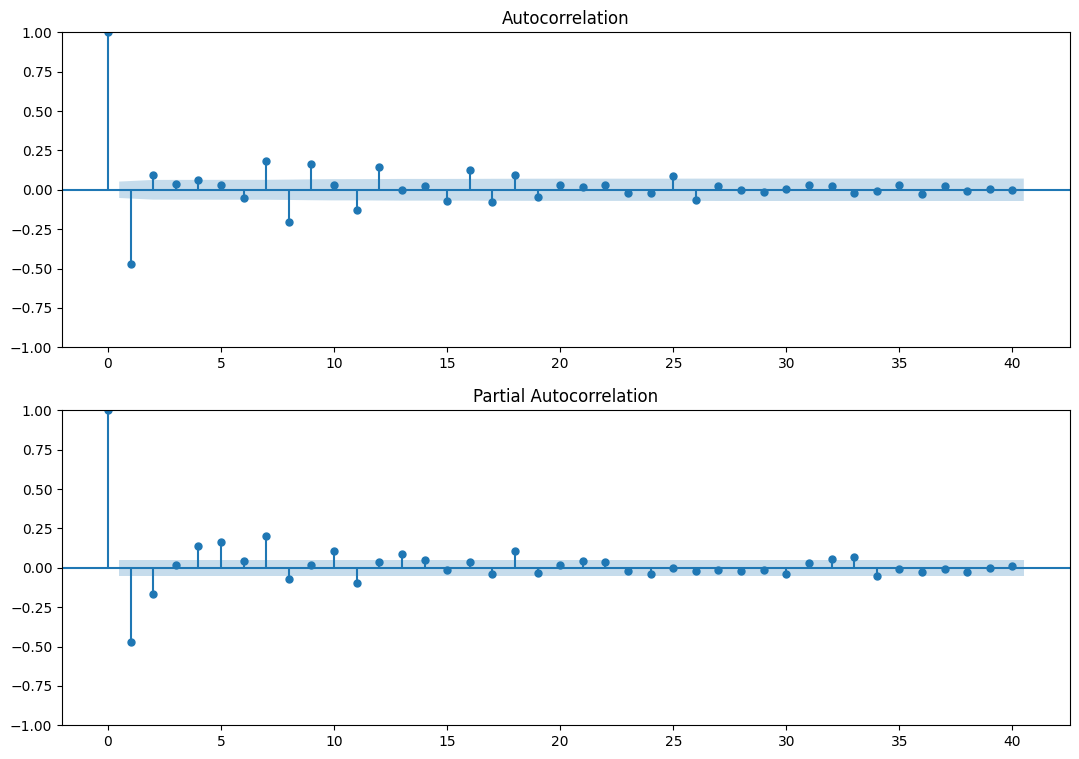

In [ ]:
#Now, plot ACF and PACF chart for the differenced time series
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20)

import statsmodels.api as sm
fig = plt.figure(figsize=(13,9))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=40,ax=ax2)

The above charts are used to decide the parameters for the ARIMA model.

From above plot,

The first line that crosses the chart (Confidence Interval) is the order of AR (Auto regression) from the AutoCorrelation Chart = 1.
and the order of MA is also 1, from the chart of Partial AutoCorrelation (PAC).
and D = 0.



Stage 3: Modelling Algorithm #1: ARIMA.

In [ ]:
!pip install statsmodels

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


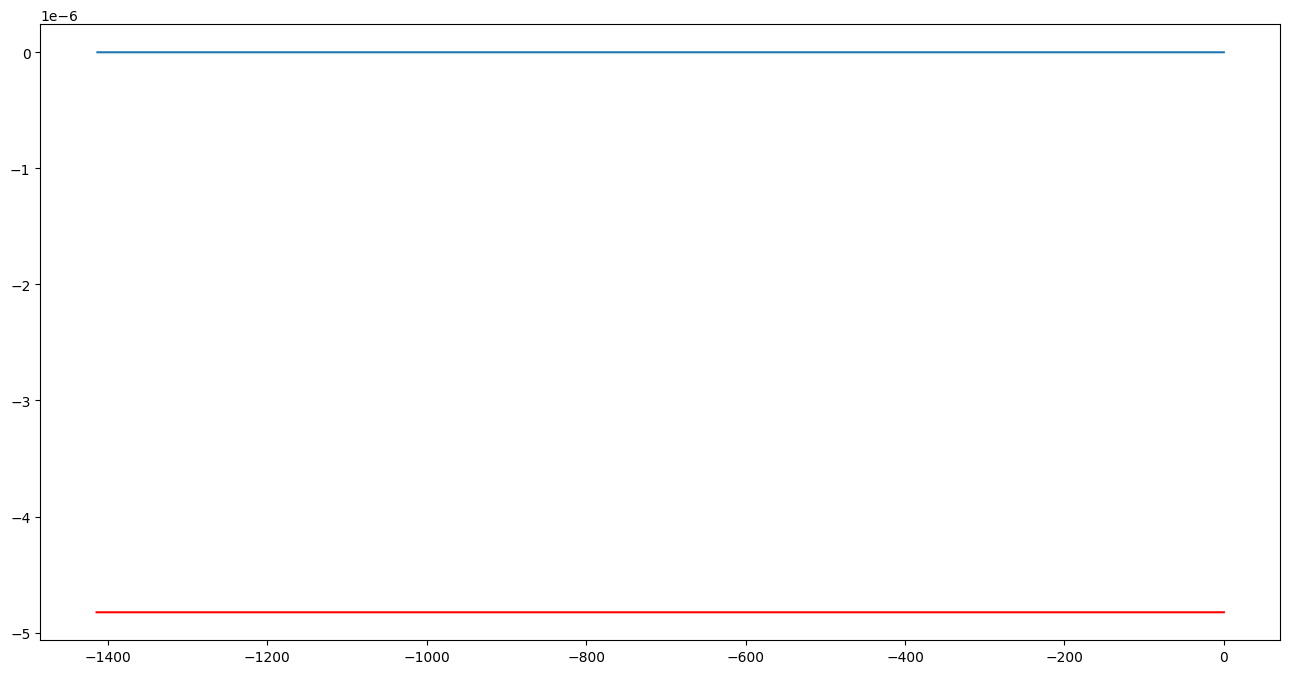

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
plt.figure(figsize=(16,8))
#ts_log_diff.dropna(inplace=True)
model = ARIMA(ts_log_diff, order=(0,0,0))
results_ARIMA = model.fit()
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

Taking results back to original scale

In [ ]:
ARIMA_diff_predictions = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(ARIMA_diff_predictions.head())

TimeSteps
-1414.0   -0.000005
-1413.0   -0.000005
-1412.0   -0.000005
-1411.0   -0.000005
-1410.0   -0.000005
dtype: float64


In [ ]:
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head())

TimeSteps
-1414.0   -0.000005
-1413.0   -0.000010
-1412.0   -0.000014
-1411.0   -0.000019
-1410.0   -0.000024
dtype: float64


In [ ]:
ARIMA_log_prediction = pd.Series(ts_log.iloc[0], index=ts_log.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0)
ARIMA_log_prediction.head()

TimeSteps
-1414.0   -0.000005
-1413.0   -0.000010
-1412.0   -0.000014
-1411.0   -0.000019
-1410.0   -0.000024
dtype: float64

Text(0.5, 1.0, 'RMSE: 0.9966')

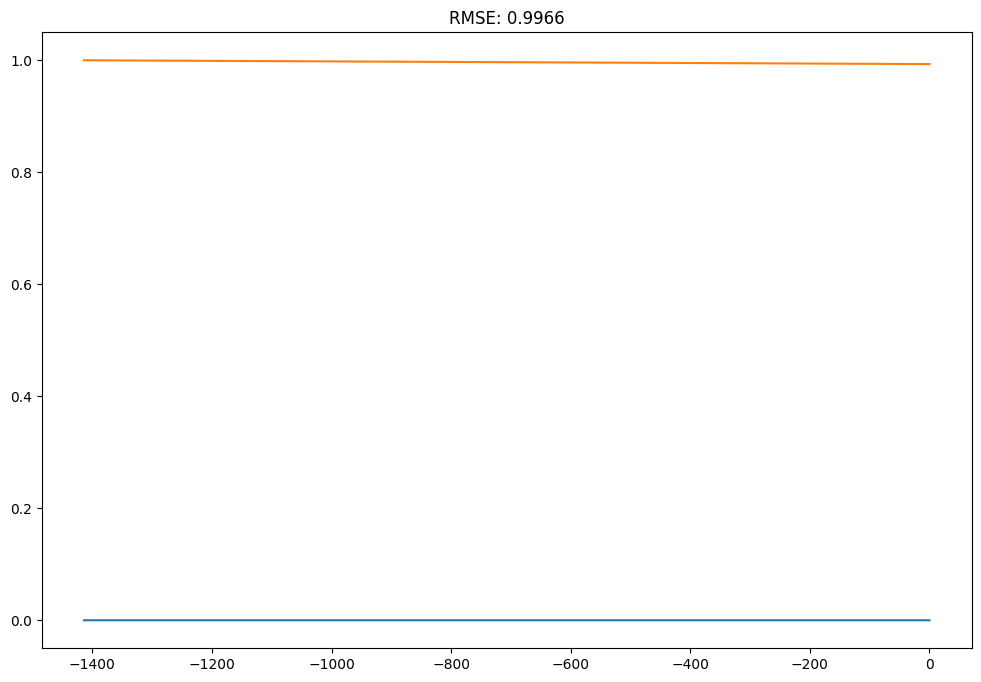

In [ ]:
plt.figure(figsize=(12,8))
predictions_ARIMA = np.exp(ARIMA_log_prediction)
plt.plot(dataFrames[5].Tilt_Value)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-dataFrames[5].Tilt_Value)**2)/len(dataFrames[5])))

In [ ]:
results_ARIMA.predict(10,20)

TimeSteps
-1404.0   -1.293021e-20
-1403.0   -2.010058e-21
-1402.0   -1.198724e-20
-1401.0   -1.390284e-21
-1400.0    4.098921e-20
-1399.0   -3.716697e-20
-1398.0   -3.992293e-21
-1397.0    5.442783e-21
-1396.0   -5.047010e-21
-1395.0    2.061834e-22
-1394.0    1.586854e-21
Name: predicted_mean, dtype: float64

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.9 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries,
                              start_p=3,
                              start_q=3,
                              max_p=5,
                              max_q=5,
                              test="adf",
                              seasonal=True,
                              trace=True)
    return automodel

In [ ]:
arimamodel(ts_log)

Performing stepwise search to minimize aic
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=1225.544, Time=5.66 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1459.002, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1358.770, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1224.898, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1457.008, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1226.686, Time=0.46 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1226.667, Time=0.70 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1227.995, Time=1.80 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1224.907, Time=0.13 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 9.587 seconds


ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True)

In [ ]:
# Split the dataset to training, test and predict.
from sklearn.metrics import mean_squared_error
from math import sqrt

# split into train and test sets
X = dataFrames[5].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
df = pd.DataFrame([x for x in train])
df.columns = ['TimeSteps','Tilt_Value']
df[['TimeSteps','Tilt_Value']] = df[['TimeSteps','Tilt_Value']].astype(float)
predictions = list()
# walk-forward validation
for t in range(len(test)):
 print(df.shape)
 model = ARIMA(df['1'], order=(5,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

(891, 2)


KeyError: '1'